# Analyzing DBZ vs ZDR vs KDP(incomplete)

In [113]:
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset
import sys
import os.path as Path
import pyart
import xradar as xd

In [110]:
files = sorted(glob.glob(f'/ccsopen/home/braut/output/kdp_lp/*'))
len(files)
file_num =200

## Read in XRadar to plot the sweep. The file only contains sweep3.

In [161]:
ds = xd.io.open_cfradial1_datatree(files[file_num], first_dim='auto')
first_sweep = ds['sweep_0'].to_dataset()
geo_ds = xd.georeference.get_x_y_z(first_sweep)
geo_ds

<xarray.Dataset>
Dimensions:       (azimuth: 1157, range: 675)
Coordinates:
    time          (azimuth) datetime64[ns] 2022-08-25T20:06:50 ... 2022-08-25...
  * range         (range) float32 -118.4 -58.44 1.501 ... 4.022e+04 4.028e+04
  * azimuth       (azimuth) float32 0.0414 0.1073 0.1251 ... 359.7 359.9 360.0
    elevation     (azimuth) float32 5.988 5.988 5.933 ... 5.988 5.988 5.988
    latitude      float64 ...
    longitude     float64 ...
    altitude      float64 ...
    x             (range, azimuth) float32 -0.08506 -0.2205 ... -101.6 -24.83
    y             (range, azimuth) float32 -117.7 -117.7 ... 4.004e+04 4.004e+04
    z             (range, azimuth) float32 -13.0 -13.0 ... 4.296e+03 4.296e+03
Data variables:
    DBZ           (azimuth, range) float64 ...
    ZDR           (azimuth, range) float64 ...
    RHOHV         (azimuth, range) float64 ...
    NCP           (azimuth, range) float64 ...
    SNR           (azimuth, range) float64 ...
    sweep_number  int32 ...
    fixed_angle   float32 ...
    sweep_mode    |S192 ...

Add 2dB offset to zdr

In [145]:
geo_ds=geo_ds.assign(ZDR=geo_ds["ZDR"] + 2) 

#### DBZ

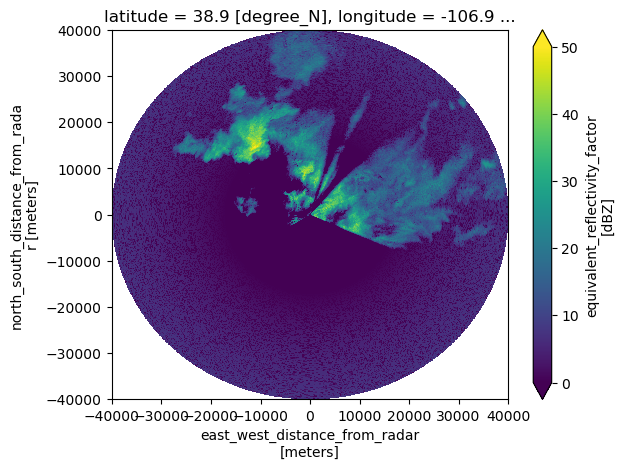

In [117]:
geo_ds.DBZ.plot(x='x', y='y', vmin=0, vmax=50)

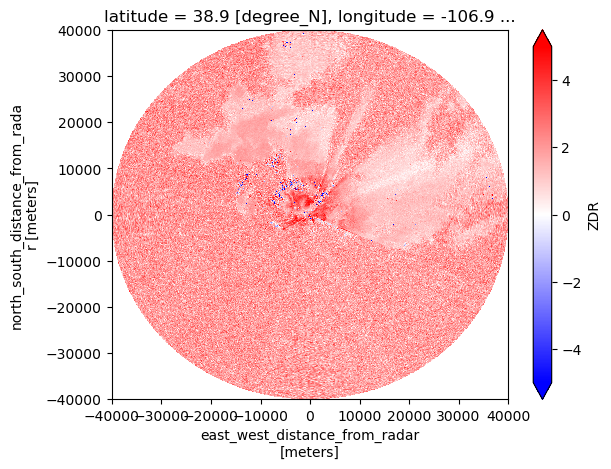

In [146]:
geo_ds.ZDR.plot(x='x', y='y', vmin=-5, vmax=5, cmap='bwr')

### Read as Numpy array (Sweep_3)

In [147]:
ncfile = Dataset(files[file_num]) # selet file with significant rain

dbz = ncfile.variables['DBZ'][:]
zdr = ncfile.variables['ZDR'][:]+2 #Add 2dB offset to zdr

kdp_lp = ncfile.variables['KDP_LP'][:]
kdp_maesaka = ncfile.variables['KDP_maesaka'][:]

dbz = dbz.flatten()
zdr = zdr.flatten()
kdp_lp = kdp_lp.flatten()
kdp_maesaka = kdp_maesaka.flatten()

In [109]:
ncfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF/Radial
    title: weather_radar_volume
    instrument_name: csu.sail
    field_names: DBZ, VEL, WIDTH, ZDR, PHIDP, RHOHV, NCP, SNR, DBZhv
    history: created by jrobrien on jupyter02.mcp.alcf.anl.gov at 2022-10-03T14:57:37.757941 using Py-ART
    dimensions(sizes): time(1157), range(675), sweep(1), string_length(192)
    variables(dimensions): int64 time(time), float32 range(range), float32 azimuth(time), float32 elevation(time), float64 DBZ(time, range), float64 ZDR(time, range), float64 RHOHV(time, range), float64 NCP(time, range), float64 SNR(time, range), float64 PHIDP_LP(time, range), float64 KDP_LP(time, range), float64 KDP_maesaka(time, range), int32 sweep_number(sweep), float32 fixed_angle(sweep), int32 sweep_start_ray_index(sweep), int32 sweep_end_ray_index(sweep), |S1 sweep_mode(sweep, string_length), float64 latitude(), float64 longitude(), float64 altitude(), |S1 time_

In [92]:
print (f'{dbz.shape}, {dbz.min()}, {dbz.max()}')

(780975,), -99900.0, 52.77000045776367


In [93]:
print (f'{zdr.shape}, {zdr.min()}, {zdr.max()}')

(780975,), -99900.0, 30.139999389648438


In [94]:
print (f'{kdp_lp.shape}, {kdp_lp.min()}, {kdp_lp.max()}')

(780975,), 9.072170238687617e-19, 46.4127480930511


In [102]:
print (f'{kdp_maesaka.shape}, {kdp_maesaka.min()}, {kdp_maesaka.max()}')

(780975,), 9.072170238687617e-19, 46.4127480930511


#### Select rainy gates

In [148]:
dbz_sel = dbz[(dbz>10) * (dbz<60)]
zdr_sel = zdr[(dbz>10) * (dbz<60)]
kdp_lp_sel = kdp_lp[(dbz>10) * (dbz<60)]
kdp_maesaka_sel = kdp_maesaka[(dbz>10) * (dbz<60)]

#### 1. Histogram of DBZ

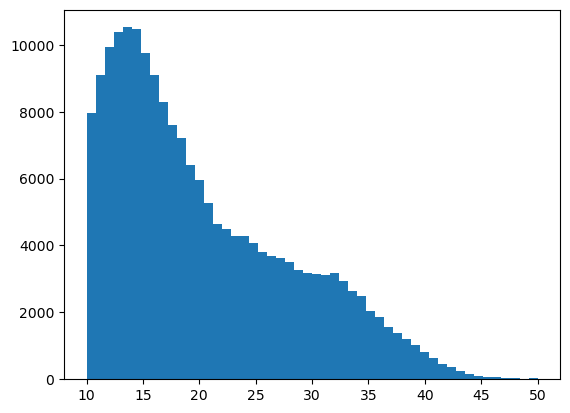

In [96]:
plt.hist(dbz_sel, range=(10, 50), bins=50)
plt.show()

#### 2. Histogram of ZDR

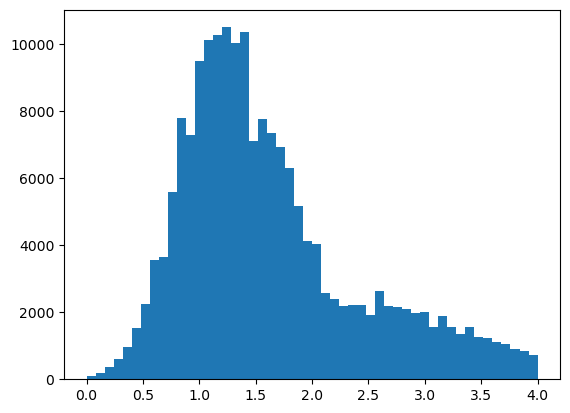

In [150]:
plt.hist(zdr_sel.flatten(), range=(0, 4), bins=50)
plt.show()

#### 3.1 Histogram of KDP LP

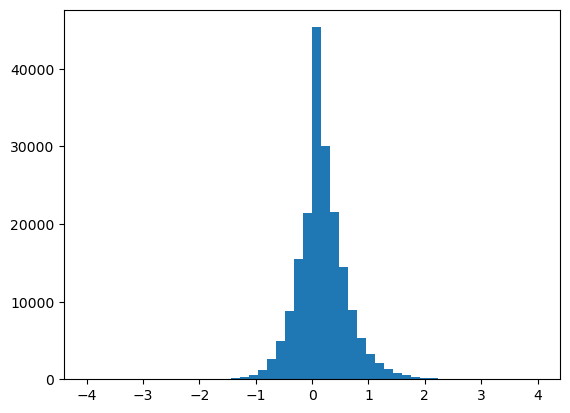

In [104]:
plt.hist(kdp_lp_sel.flatten(), range=(-4, 4), bins=50)
plt.show()


#### 3.2. Histogram of KDP Maesaka

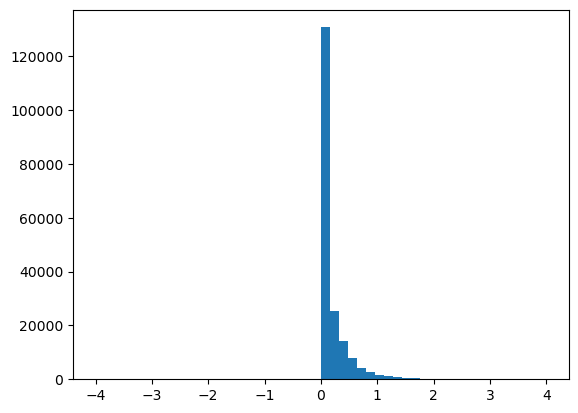

In [105]:
plt.hist(kdp_maesaka_sel.flatten(), range=(-4, 4), bins=50)
plt.show()

#### 4. Scattered plot of DBZ vs ZDR

(-1.0, 6.0)

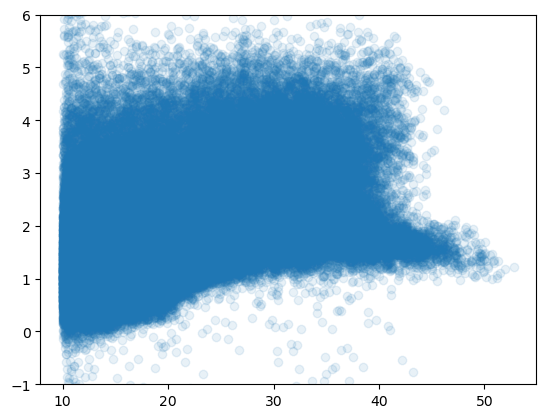

In [153]:
plt.scatter(dbz_sel, zdr_sel, alpha=0.1)
plt.ylim(-1, 6)

#### 5.1 Scattered plot of DBZ vs KDP LP

(-5.0, 5.0)

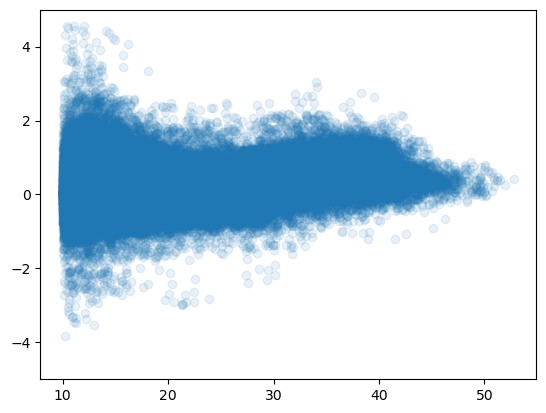

In [162]:
plt.scatter(dbz_sel, kdp_lp_sel, alpha=0.1)
plt.ylim(-5, 5)

#### 5.2 Scattered plot of DBZ vs KDP Maesaka

(-1.0, 5.0)

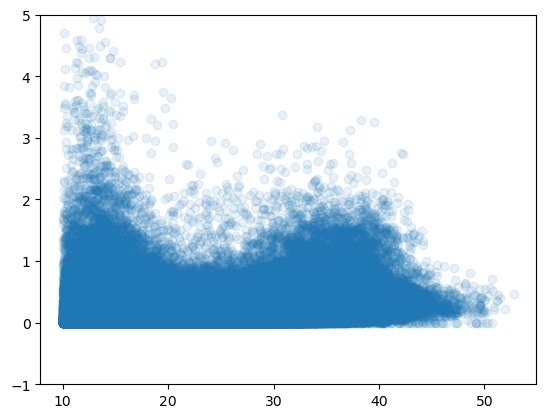

In [108]:
plt.scatter(dbz_sel, kdp_maesaka_sel, alpha=0.1)
plt.ylim(-1, 5)

#### 6.1 Scattered plot of ZDR vs KDP LP

(-5.0, 5.0)

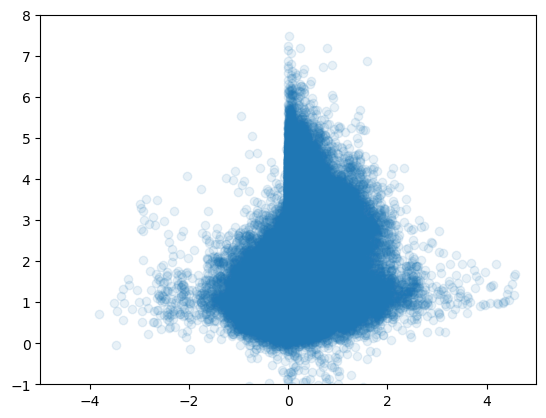

In [160]:
plt.scatter(kdp_lp_sel, zdr_sel,  alpha=0.1)
plt.ylim(-1, 8)
plt.xlim(-5, 5)

#### 6.2 Scattered plot of ZDR vs KDP Maesaka

(-1.0, 6.0)

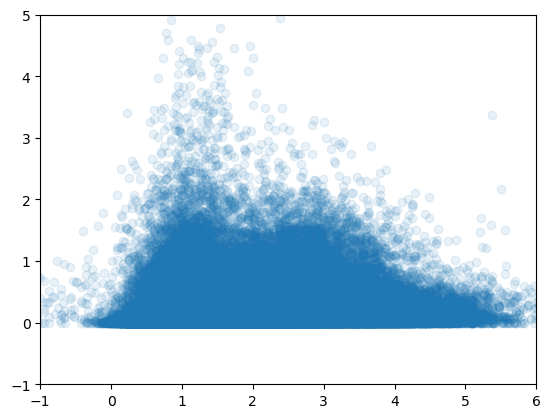

In [158]:
plt.scatter(zdr_sel, kdp_maesaka_sel, alpha=0.1)
plt.ylim(-1, 5)
plt.xlim(-1, 6)